# Exercise 2: Bathymetry

Aim: To work with bathymetry data and plot a contour figure

- Author: Joshua Schöneich
- Purpose: Plot profile data
- Date: 2024-10-28

Four figures should be generated:
- ex2fig1-Lastname-Messfern.png: Map of bathymetry
- ex2fig2-Lastname-Messfern.png: Second map of bathymetry

Packages: You will need to install the package `netCDF4` and `cartopy`, and - if you choose to do the "extra challenge" - `cmocean`.
<hr>

In [1]:
# Importing required packages here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import netCDF4
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from matplotlib.ticker import ScalarFormatter
from modules.bathymetry import *



# URL for the bathymetry data

1. Navigate to [ETOPO bathymetry](https://www.ncei.noaa.gov/products/etopo-global-relief-model)

2. Launch grid extract.  Choose ETOPO_2022 (Bedrock; 60 arcseconds)

3. Choose an area of interest, e.g. 66N, 63N, 35W (-35) and 25W (-25).

4. Download data

In [2]:
rootdir = '/Users/eddifying/Cloudfree/gitlab-cloudfree/messfern-plot/bathy/'
bathymetry_data_path = rootdir + 'data/ETOPO_2022_v1_60s_N90W180_bed.nc'
bathymetry_data = get_bathymetry_data()

# Choose your Area of intrest
min_lon = -70
max_lon = -55
min_lat = -60
max_lat = -55


bathymetry_subset = get_bathymetry_subset_data(
    bathymetry_data,
    min_lon, max_lon,
    min_lat, max_lat
)

bathymetry_data = BathymetryDataSingleton()
bathymetry_data.set(bathymetry_subset)
print(bathymetry_subset)

print("Bathymetry data contains NaNs:", np.any(np.isnan(bathymetry)))
print("Bathymetry data max:", np.nanmax(bathymetry), "min:", np.nanmin(bathymetry))


# Output file paths for figures
figdir = '../figures/'
if not os.path.exists(figdir):
    os.makedirs(figdir)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(900), lat(300)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 z(lat, lon)
    groups: 


NameError: name 'bathymetry' is not defined

## Make a simple plot

### Using Matplotlib

In [ ]:
# Extract the latitude, longitude, and bathymetry data
lats = bathymetry_subset.variables['lat'][:]
lons = bathymetry_subset.variables['lon'][:]
bathymetry = bathymetry_subset.variables['z'][:]

# Define the coordinates of the point to add
point_lon = -27.270200  # Longitude of the point
point_lat = 66.0128  # Latitude of the point

# Create a contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(lons, lats, bathymetry, cmap='viridis')
plt.colorbar(contour, label='Depth (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Map')
plt.grid(True)

# Add the point to the map
plt.plot(point_lon, point_lat, color='red', marker='o', markersize=10, label='DS2 mooring')

#Add a legend
plt.legend()

# Save the figure
plt.savefig(figdir + 'ex2fig1-Schöneich-Messfern.png')
plt.show()

### Plot a map using cartopy

NameError: name 'figdir' is not defined

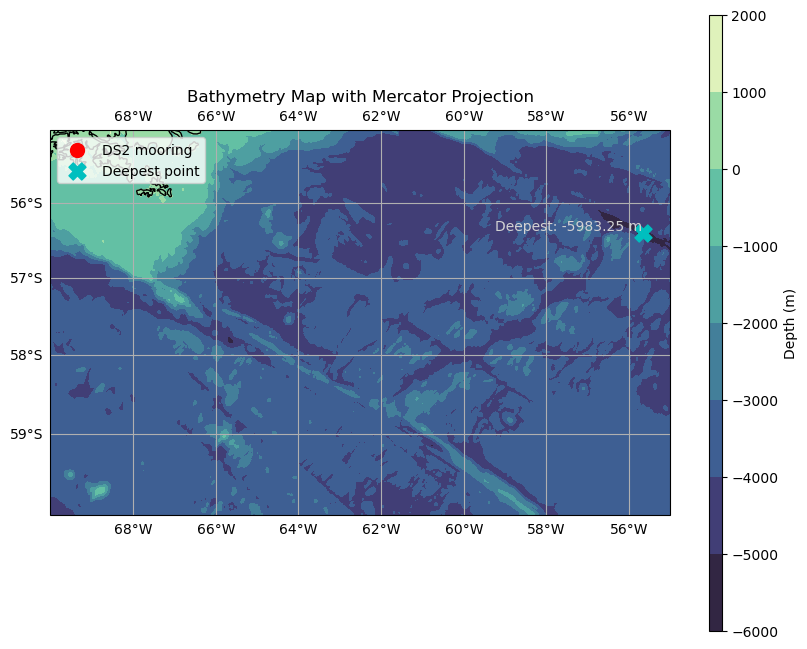

In [3]:
# Extract the latitude, longitude, and bathymetry data
lats = bathymetry_subset.variables['lat'][:]
lons = bathymetry_subset.variables['lon'][:]
bathymetry = bathymetry_subset.variables['z'][:]

#Find the index of the deepest point in the bathymetry data
deepest_index = np.unravel_index(np.nanargmin(bathymetry), bathymetry.shape)
deepest_lon = lons[deepest_index[1]]  # Longitude corresponding to the deepest point
deepest_lat = lats[deepest_index[0]]  # Latitude corresponding to the deepest point
deepest_value = bathymetry[deepest_index]  # Depth value at the deepest point

# Create a figure and axis with a Mercator projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Mercator()})

# Add coastlines and gridlines
ax.coastlines(resolution='10m')

# Add gridlines and set to draw labels
gridlines = ax.gridlines(draw_labels=True)

# Turn off the latitude labels on the right side
gridlines.right_labels = False

# Set the extent to the area of interest
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot the bathymetry data
contour = ax.contourf(lons, lats, bathymetry, cmap=cmocean.cm.deep_r, transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=50)
cbar.set_label('Depth (m)')

# Add title
plt.title('Bathymetry Map with Mercator Projection')

# Define the coordinates of the point to add
point_lon = -27.270200  # Longitude of the point
point_lat = 65.0128  # Latitude of the point

# Add the point to the map
ax.scatter(point_lon, point_lat, color='red', s=100, marker='o', transform=ccrs.PlateCarree(), label='DS2 mooring')

#Mark the deepest point on the map
ax.scatter(deepest_lon, deepest_lat, color='c', s=150, marker='X', transform=ccrs.PlateCarree(), label='Deepest point')
ax.text(deepest_lon, deepest_lat, f'Deepest: {deepest_value:.2f} m', color='lightgrey', fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', transform=ccrs.PlateCarree())


plt.legend(loc='upper left')
# Save the figure
plt.savefig(figdir + 'ex2fig2-Schöneich-Messfern.png')
plt.show()

## Now edit the maps - work with the cartopy version

- Add a single point location using a circle for the DS2 mooring (66.0128 latitude, -27.270200 longitude)
- Add a legend that specifies "DS2 mooring" for the circle
- Turn off latitude markers on the right hand side of the plot
- Install the `cmocean` package, and change the color scale to something appropriate for bathymetry


- **Extra challenge:** Mark the deepest point on the map with a square

Check that your figure output to the `figures/` directory has these new updates.


NameError: name 'figdir' is not defined

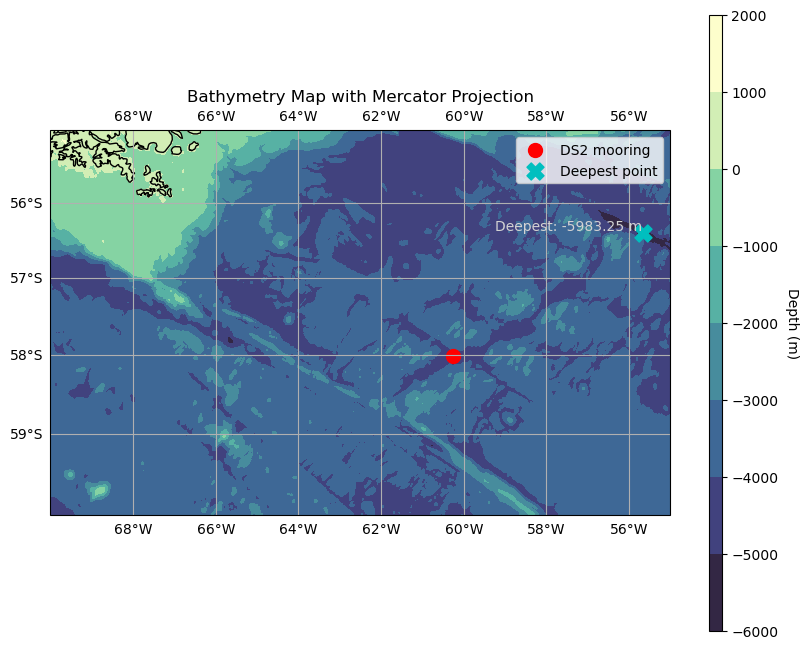

In [4]:
# Extract the latitude, longitude, and bathymetry data
lats = bathymetry_subset.variables['lat'][:]
lons = bathymetry_subset.variables['lon'][:]
bathymetry = bathymetry_subset.variables['z'][:]

#Find the index of the deepest point in the bathymetry data
deepest_index = np.unravel_index(np.nanargmin(bathymetry), bathymetry.shape)
deepest_lon = lons[deepest_index[1]]  # Longitude corresponding to the deepest point
deepest_lat = lats[deepest_index[0]]  # Latitude corresponding to the deepest point
deepest_value = bathymetry[deepest_index]  # Depth value at the deepest point

vmin = np.nanmin(bathymetry)
vmax = np.nanmax(bathymetry)

# Create a figure and axis with a Mercator projection
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.Mercator()})

# Add gridlines and set to draw labels
gridlines = ax.gridlines(draw_labels=True)

# Turn off the latitude labels on the right side
gridlines.right_labels = False

# Set the extent to the area of interest
ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())

# Plot the bathymetry data
contour = ax.contourf(lons, lats, bathymetry, cmap=cmocean.cm.deep_r, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=50)
cbar.set_label('Depth (m)', rotation=270, labelpad=15)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')

# Add title
plt.title('Bathymetry Map with Mercator Projection')

# Define the coordinates of the point to add
point_lon = -60.270200  # Longitude of the point
point_lat = -58.0128  # Latitude of the point

# Add the point to the map
ax.scatter(point_lon, point_lat, color='red', s=100, marker='o', transform=ccrs.PlateCarree(), label='DS2 mooring')

#Mark the deepest point on the map
ax.scatter(deepest_lon, deepest_lat, color='c', s=150, marker='X', transform=ccrs.PlateCarree(), label='Deepest point')
ax.text(deepest_lon, deepest_lat, f'Deepest: {deepest_value:.2f} m', color='lightgrey', fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', transform=ccrs.PlateCarree())

plt.legend(loc='upper right')
# Save the figure
plt.savefig(figdir + 'ex2fig3-Schöneich-Messfern.png')
plt.show()